# **EDA**

# 1. 데이터 불러오기

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# 경로 지정
base_path = '/content/drive/MyDrive/AIVLE/BigProject/'

df = pd.read_csv(base_path + 'EcoatingDataset.csv')

# 2. 데이터 탐색

- 데이터셋 정보

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOT             16730 non-null  int64  
 1   Thick           16730 non-null  float64
 2   PT_jo_V_1       16730 non-null  float64
 3   PT_jo_A_Main_1  16730 non-null  float64
 4   PT_jo_TP        16730 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 653.6 KB


None

- 데이터셋 구성

In [ ]:
display(df.describe())

,LOT,Thick,PT_jo_V_1,PT_jo_A_Main_1,PT_jo_TP
count,16730.000000,16730.000000,16730.000000,16730.000000,16730.000000
mean,8365.500000,2.444689,25.965666,9.389498,3.356467
std,4829.679337,0.252182,3.095840,6.437220,0.064095
min,1.000000,1.610000,15.500000,0.000000,3.200000
25%,4183.250000,2.250000,23.100000,4.400000,3.300000
50%,8365.500000,2.420000,27.900000,7.900000,3.400000
75%,12547.750000,2.640000,28.000000,12.700000,3.400000
max,16730.000000,3.340000,31.700000,32.600000,3.500000


- 사분위수

In [ ]:
df.describe().T[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
LOT,1.00,4183.25,8365.50,12547.75,16730.00
Thick,1.61,2.25,2.42,2.64,3.34
PT_jo_V_1,15.50,23.10,27.90,28.00,31.70
PT_jo_A_Main_1,0.00,4.40,7.90,12.70,32.60
PT_jo_TP,3.20,3.30,3.40,3.40,3.50


# 3. 데이터 분석

- 상관 관계 계수

In [ ]:
continuous_cols = ['Thick', 'PT_jo_V_1', 'PT_jo_A_Main_1', 'PT_jo_TP']
correlation_matrix = df[continuous_cols].corr()

display(correlation_matrix)

,Thick,PT_jo_V_1,PT_jo_A_Main_1,PT_jo_TP
Thick,1.000000,0.625920,0.264692,0.047500
PT_jo_V_1,0.625920,1.000000,0.354799,0.136947
PT_jo_A_Main_1,0.264692,0.354799,1.000000,0.078890
PT_jo_TP,0.047500,0.136947,0.078890,1.000000


- 주성분 분석 (PCA)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 특성 선택 및 정규화
X = df[['PT_jo_V_1', 'PT_jo_A_Main_1', 'PT_jo_TP']]
X_scaled = StandardScaler().fit_transform(X)

# 2. PCA 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3. 로딩 행렬 정리 (DataFrame으로 변환)
loadings = pd.DataFrame(
    pca.components_.T,  # 전치하여 변수 기준으로 정렬
    index=['PT_jo_V_1', 'PT_jo_A_Main_1', 'PT_jo_TP'],
    columns=['PC1', 'PC2', 'PC3']
)

# 4. 소수점 6자리까지 보기 원하면:
pd.set_option("display.precision", 6)

# 5. 결과 출력
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("\nPCA Loadings:\n", loadings)

Explained variance ratio: [0.47056073 0.3160882  0.21335107]

PCA Loadings:
                      PC1       PC2       PC3
PT_jo_V_1       0.675690 -0.157590  0.720145
PT_jo_A_Main_1  0.649241 -0.335510 -0.682583
PT_jo_TP        0.349183  0.928762 -0.124387


### **결과 분석**



1. **상관계수 분석 결과** - 전압과 전류는 두께와 비교적 강한 양의 상관 관계를 보였으며, 온도는 낮은 상관성을 보임. 이는 두께에 가장 큰 영향을 미치는 요인이 전압과 전류임을 시사함.

2. **PCA 주성분 분석 결과** - 전체 분산의 약 78%가 PC1과 PC2 두 개의 주 성분으로 설명되었으며, 전압과 전류가 PC1에 높은 기여도를 보인 반면, 온도는 PC2에서 두드러진 영향을 미침. 이는 온도가 다른 변수들과 독립적인 방향으로 정보를 제공하고 있음을 의미함.

3. **최종 결론** - 종합적으로 볼 때, 전압과 전류는 두께 예측에 중요한 변수이며 온도는 상대적으로 기여도가 낮지만, 데이터의 다양한 측면을 보완하는 보조 지표로서의 의미가 있음.





# 4. 데이터 시각화

- 히스토그램

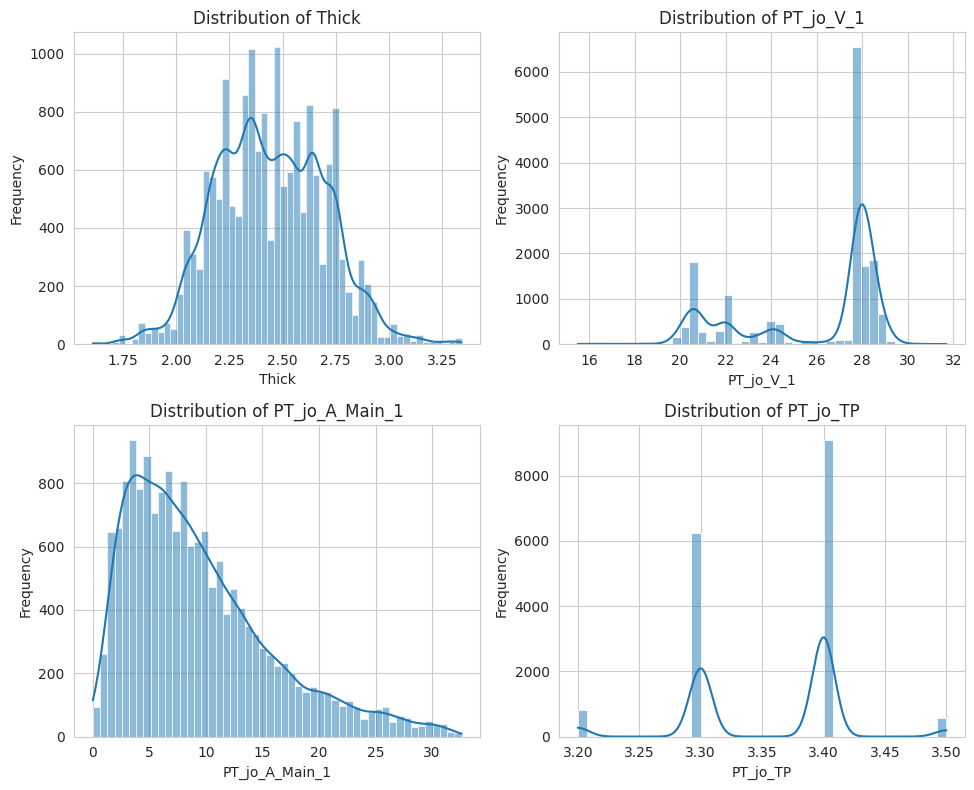

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Select continuous columns excluding 'LOT'
continuous_cols = ['Thick', 'PT_jo_V_1', 'PT_jo_A_Main_1', 'PT_jo_TP']

# Create histograms and density plots for continuous variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Box Plot

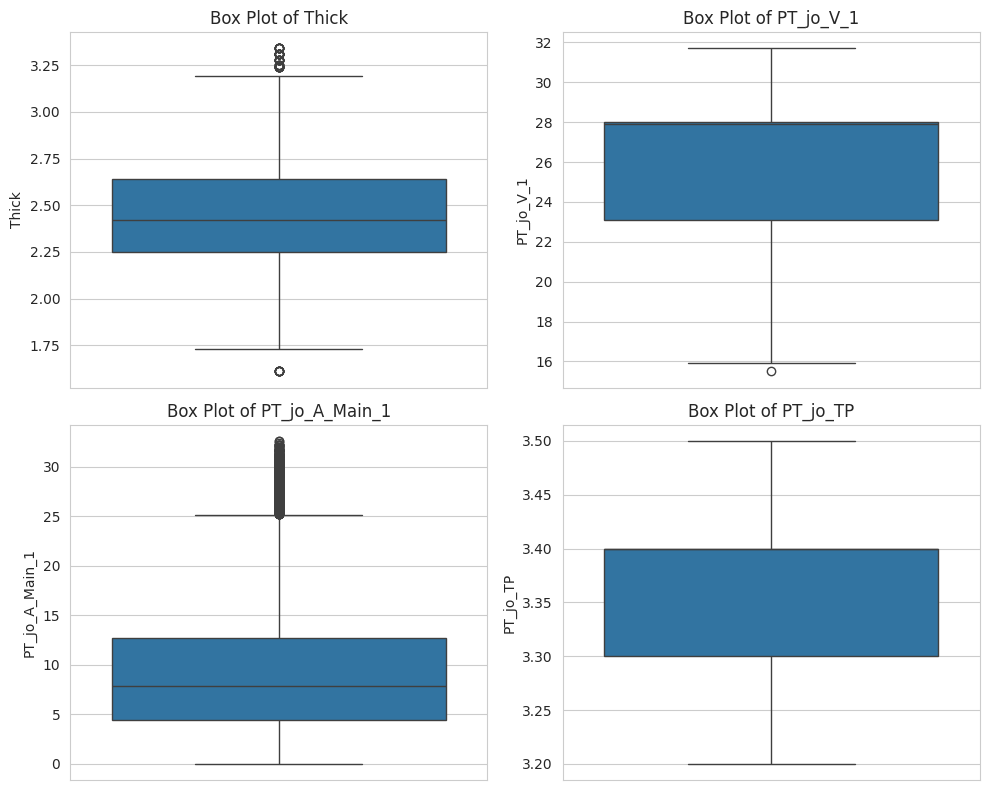

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Select continuous columns excluding 'LOT'
continuous_cols = ['Thick', 'PT_jo_V_1', 'PT_jo_A_Main_1', 'PT_jo_TP']

# Create box plots for continuous variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- 상관 행렬 히트맵

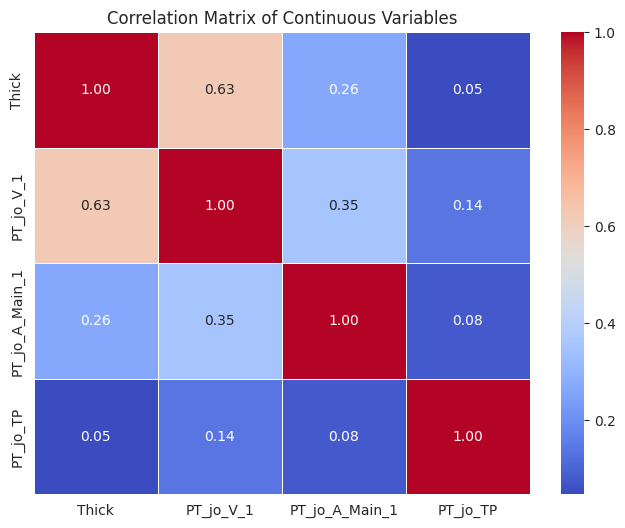

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()